<a href="https://colab.research.google.com/github/RobertoFernandez1/EIE_401_MULTIMEDIA/blob/main/Actividad_6_FernandezRoberto_RobertoFernandez1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>


<center><h2>Actividad 6</h2></center>
<center><h3>Audio</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Roberto Fernandez Fuentes</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


## 1. Operaciones para extracción de características.

### 1.1 Con un audio (voz o música) no mayor a 30 segundos, utilizando la libreria Librosa (https://librosa.org/), numpy, pytorch, implementa operaciones fundamentales como:
- Media
- Kurtosis
- Skewness
- Zero Crossing Rate
- Spectral Centroid
- Energía
- RMSE
- Frecuencia fundamental
<p align="justify">
Estas operaciones son fundamentales en el proceso de extracción de características. Explica el resultado obtenido y que significa cada uno.

In [4]:
pip install librosa

In [3]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import librosa
import librosa.display

Sound = "/content/Y2meta.app - #WowOfNow Challenge_ Fastest Piano Solo in 20 Seconds! (128 kbps).wav" #Nombre del archivo de audio que ocuparemos
waveform, sample_rate = librosa.load(Sound, sr=None)

# Reproducir el audio
Audio(data=waveform, rate=sample_rate)



In [5]:
#Con las librerias numpy podemos calcular la energia ,media,con librosa el cruce por 0 ,el spectral centroid ,el rmse ,y con las funciones incluidad de scipy.stats la kurtosis y el skew
import librosa
import numpy as np
from scipy.stats import kurtosis, skew

audio ,sr=librosa.load(Sound,sr=None)
media=np.mean(audio)
kurt=kurtosis(audio)
skewness=skew(audio)
zero_crossing_rate = librosa.feature.zero_crossing_rate(audio)
t=len(zero_crossing_rate)
spectral_centroid = librosa.feature.spectral_centroid(y=audio, sr=sr)
r=len(spectral_centroid)
energia = np.sum(audio**2)
rmse = librosa.feature.rms(y=audio)
x=len(rmse)
#pitches, magnitudes = librosa.piptrack(y=audio, sr=sr)
#fundamental_frequency_index = np.argmax(magnitudes)
#fundamental_frequency = pitches[fundamental_frequency_index]
print("media",media)
print("kurtosis",kurt)
print("skewness",skewness)
print("ZeroCrossingRate",t)
print("SpectralCentroid",r)
print("Energia",energia)
print("Rmse",x)
#print("Frecuencia fundamental",fundamental_frequency)




media -0.005670555
kurtosis 1.4939348322265662
skewness -0.0427988978585552
ZeroCrossingRate 1
SpectralCentroid 1
Energia 36974.984
Rmse 1


## 2. Implementaciones

### 2.1 Utilizando Pytorch Audio obtenga el espectrograma del audio original
El espectrograma debe producirse para valores número de muestras para la transformada rápida de fourier de  32, 128, 512.


/usr/local/lib/python3.10/dist-packages/torchaudio/functional/functional.py:584: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


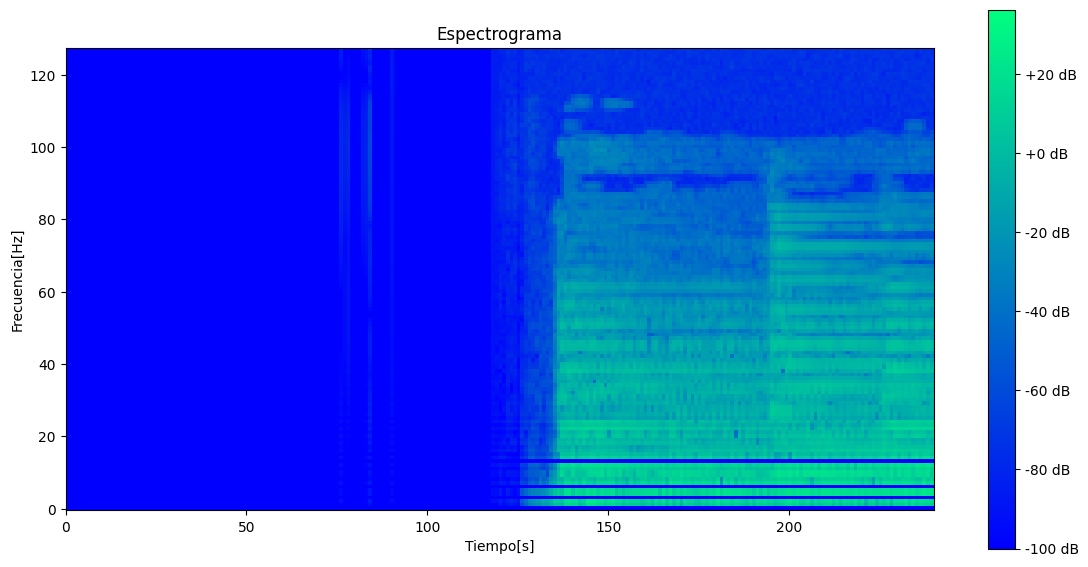

In [9]:
import torch
import torchaudio
import numpy as np
import matplotlib.pyplot as plt
waveform,sample_rate=torchaudio.load("/content/Y2meta.app - #WowOfNow Challenge_ Fastest Piano Solo in 20 Seconds! (128 kbps).wav")
spectrogram=torchaudio.transforms.MelSpectrogram()(waveform)
log_spectrogram=torchaudio.transforms.AmplitudeToDB()(spectrogram)
plt.figure(figsize=(14,7))
plt.imshow(log_spectrogram[0].numpy(),cmap="winter",origin="lower")
plt.xlabel("Tiempo[s]")
plt.xlim(0,240)
plt.ylabel("Frecuencia[Hz]")
plt.colorbar(format="%+2.0f dB")
plt.title("Espectrograma")

plt.show()


### 2.2 Utilizando Pytorch audio y Librosa, implementa Mel Frequency Cepstral Coefficients (MFCCs) (opcional)

Sigue el siguiente ejemplo (https://www.kaggle.com/code/ilyamich/mfcc-implementation-and-tutorial) y explica que significa el resultado obtenido, graficando los coeficientes en un espectrograma. Investiga sobre Cepstral Analysis.


### 3. Audio Processing
### 3.1 En matlab, del paquete de procesamiento de audio, debes elegir una función de la librería, estudiarla y hacer un ejemplo.

Debes enviar un informe en PDF de 1 (una) página explicando, el algoritmo seleccionado, como funciona y el ejemplo que desarrollaste. Incluye por lo menos un gráfico que demuestre el trabajo realizado.

Debes subir a tu repositorio el código en matlab con dicha solución.

En el sitio  https://la.mathworks.com/help/audio/index.html?s_tid=CRUX_lftnav y https://la.mathworks.com/help/audio/audio-processing-algorithm-design.html, encuentras diferentes funciones para generar efectos como reverberancia o control de la onda (compresores, gates, etc)

Así mismo, en el sitio https://la.mathworks.com/help/signal/measurements-and-feature-extraction.html, encuentras ejemplos para extracción de caracteristicas de la señal de audio, por ejemplo métricas de pulso y de transición.


    

## 5. Referencias
<p align="justify">
    
[Análisis espectral para audio] https://ccrma.stanford.edu/~jos/mdft/mdft-python.html

[Análisis espectral] https://currents.soest.hawaii.edu/ocn_data_analysis/_static/Spectrum.html

[MFCC]https://medium.com/@derutycsl/intuitive-understanding-of-mfccs-836d36a1f779

[Cepstrum]https://www.kuniga.me/blog/2021/12/11/pitch-via-cepstrum.html

[LPC] https://www.youtube.com/watch?v=DIr6SPdK4NA

[LPC] https://www.kuniga.me/blog/2021/05/13/lpc-in-python.html

[MFCC] https://librosa.org/doc/0.10.1/generated/librosa.feature.mfcc.html#librosa.feature.mfcc

[MFCC] https://pytorch.org/audio/main/generated/torchaudio.transforms.MFCC.html


In [ ]:
##Codigo de matlab


frameLength = 1024;
fileReader = dsp.AudioFileReader(...
    'C:\Users\rf550\Downloads\Y2meta.app - #WowOfNow Challenge_ Fastest Piano Solo in 20 Seconds! (128 kbps).wav', ...
    'SamplesPerFrame',frameLength);
deviceWriter = audioDeviceWriter( ...
    'SampleRate',fileReader.SampleRate);

scope = timescope( ...
    'SampleRate',fileReader.SampleRate, ...
    'TimeSpan',2, ...
    'BufferLength',fileReader.SampleRate*2*2, ...
    'YLimits',[-1,1], ...
    'TimeSpanOverrunAction',"Scroll");

reverb = reverberator( ...
    'SampleRate',fileReader.SampleRate, ...
    'PreDelay',0.5, ...
    'WetDryMix',0.4);

while ~isDone(fileReader)
    signal = fileReader();
    reverbSignal = reverb(signal);
    deviceWriter(reverbSignal);
    scope([signal,mean(reverbSignal,2)])
end

release(fileReader)
release(deviceWriter)
release(reverb)
release(scope)
